In [1]:
from pathlib import Path
import pandas as pd

In [2]:
dataFolder = Path.cwd().joinpath('Data')

In [3]:
implogs = sorted(list(dataFolder.glob('imp.201310[1-2][9,0,1,2,3,4,5,6,7].txt.bz2')))

In [4]:
clklogs = sorted(list(dataFolder.glob('clk.201310[1-2][9,0,1,2,3,4,5,6,7].txt.bz2')))

In [5]:
implogs[0]

PosixPath('/mnt/New Volume/Projects/Challenges/zypmedia/Click-Through-Rate-Prediction/Data/imp.20131019.txt.bz2')

In [6]:
columnHeaders = ['bidID', 'Timestamp', 'logType', 'XYZID', 'useragent', 'ip', 'region', 'city', 'adexchange', 'domain', \
                 'url', 'anonURLID', 'adSlotID', 'width', 'height', 'visibility', \
                 'format', 'slotPrice', 'creativeId', 'bidprice', 'payPrice', 'keypageUrl', 'adverId', 'userTag']

In [7]:
impDf = pd.read_csv(implogs[2], sep='\t', names=columnHeaders, compression='bz2')

In [8]:
impDf.head()

,bidID,Timestamp,logType,XYZID,useragent,ip,region,city,adexchange,domain,...,height,visibility,format,slotPrice,creativeId,bidprice,payPrice,keypageUrl,adverId,userTag
0,49b5a58c3a3c39c32ba5a36f70a3daa5,20131021192300738,1,C4NDR12~1B,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,222.218.230.*,238,246,1,9a2acabba41e00373f68053fd73e4d50,...,250,FirstView,Na,0,10722,294,201,NaN,2821,10063
1,c1078ebfa50f21c9c835abe38ed9a30c,20131021100401227,1,C7JCqa3e3g,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT ...,183.9.173.*,216,236,2,13625cb070ffb306b425cd803c4b7ab4,...,600,Na,Na,148,7317,277,148,NaN,2259,"10102,10024,13866,10133"
2,f19257fc9a29e12366e51ec0f6f89cdf,20131021100401241,1,C7JCqa3e3g,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT ...,183.9.173.*,216,236,2,13625cb070ffb306b425cd803c4b7ab4,...,90,Na,Na,221,7330,277,221,NaN,2259,"10102,10024,13866,10133"
3,a10d601d8d23a36921ce597e0fb327f1,20131021210002124,1,C8INvJAR60,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT ...,218.107.8.*,216,217,4,de6d8b674cde8053f9c5c082d1c3032e,...,90,FirstView,Na,30,10717,294,36,NaN,2821,"10048,16751,14273,10117,10083,13776,10110,1340..."
4,322cbb15e02fac50eef7597ed385dad7,20131021104212803,1,C9DH0S4Fezi,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT ...,14.118.89.*,216,223,1,f9945190249543d821199b597257ffe8,...,280,ThirdView,Na,0,7326,294,143,NaN,2259,"10048,13800,10684,10074,10024,10006,10111,1013..."


In [20]:
set(list(impDf.adexchange.unique())).union([5])

{1, 2, 3, 4, 5}

In [125]:
impDf.isna().any()

bidID         False
Timestamp     False
logType       False
XYZID         False
useragent      True
ip            False
region        False
city          False
adexchange    False
domain         True
url            True
anonURLID      True
adSlotID      False
width         False
height        False
visibility    False
format        False
slotPrice     False
creativeId    False
bidprice      False
payPrice      False
keypageUrl     True
adverId       False
userTag        True
dtype: bool

In [76]:
clkDf = pd.read_csv(clklogs[3], sep='\t', names=columnHeaders, compression='bz2')

In [77]:
len(clkDf)

391

In [78]:
impDf['click'] = 0

In [82]:
impDf.loc[impDf.bidID.isin(clkDf.bidID),'click'] = 1

In [88]:
impDf['slotPrice'].unique()

array([  5,  30,  20,   0,  70,  92,   4,  50, 180,  80,  67,   8,  32,
        10,  40,  63,  77,  31,  23, 100,  90,  75, 103, 125, 140,  13,
       199,  52, 148,  62,  38,  39,  89,  15, 221, 153, 133, 160, 115,
       177,  33,  36, 107, 118, 188,  93,  76,  61,  74,  64, 192, 244,
        59, 111, 150,  45, 206, 259,  81, 233, 237, 138, 239, 271,  54,
        18,  16, 105,  88, 123,  69, 191, 229, 121, 122, 263, 246, 267,
        53, 216,   7, 144,  46, 117, 146, 185, 252,  79, 225, 136, 183,
       159,  25,   6, 124, 236, 269, 250, 260, 131, 238, 113, 168, 142,
       186,  11,  24, 130,  34, 209,  14, 265, 172,  48, 248,  84, 119,
        72, 224, 156, 147,  68, 275, 101, 198,  28, 223, 247, 214, 234,
       213, 135,  73, 157, 174,  35, 145, 249, 126, 202, 176, 178,  27,
       241,  95, 137, 251, 261, 128, 112,  47])

In [89]:
impDf.apply(pd.Series.nunique)

bidID         692782
Timestamp     624078
logType            1
XYZID         645885
useragent      58328
ip            281081
region            35
city             370
adexchange         4
domain         10887
url           278619
anonURLID          0
adSlotID       21243
width             17
height            11
visibility         7
format             1
slotPrice        151
creativeId        30
bidprice           2
payPrice         295
keypageUrl         0
adverId            2
userTag       224724
click              2
dtype: int64

In [ ]:
bidDf = pd.read_csv(bidlogs[5], sep='\t', names=bidcolumnHeaders, compression='bz2')

In [ ]:
impDf.apply(pd.Series.nunique)# Timestamp, XYZID, useragent, ip, domain, url, adSlotID,creativeId
#numeric: width, height, slotPrice, bidPrice, payPrice

In [101]:
impDf.adverId.unique()

array([2821, 2259])

In [90]:
impDf.adexchange.unique()

array([2, 4, 3, 1])

In [94]:
cat = impDf.adexchange.astype('category', categories=[1,2,3,4,5])

/home/sameer/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  if __name__ == '__main__':


In [96]:
pd.get_dummies(cat, prefix='ad')

,ad_1,ad_2,ad_3,ad_4,ad_5
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,0,1,0,0
4,1,0,0,0,0
5,0,0,0,1,0
6,0,0,0,1,0
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


In [97]:
impDf.index = impDf.bidID

In [115]:
impDf.drop(['bidID'], axis=1, inplace=True)

In [116]:
impDf.is

Index(['Timestamp', 'logType', 'XYZID', 'useragent', 'ip', 'region', 'city',
       'adexchange', 'domain', 'url', 'anonURLID', 'adSlotID', 'width',
       'height', 'visibility', 'format', 'slotPrice', 'creativeId', 'bidprice',
       'payPrice', 'keypageUrl', 'adverId', 'userTag'],
      dtype='object')

In [126]:
features = {
	'categorical' : ['region', 'city', 'adexchange','visibility', 'format', 'adverId'],
	'numeric' : ['width', 'height', 'slotPrice', 'bidPrice', 'payPrice'],
	'drop' : ['Timestamp', 'logType', 'XYZID', 'useragent', 'ip', 'domain', 'url',\
			'anonURLID', 'adSlotID', 'creativeId', 'userTag','keypageUrl', 'bidID']			]
}

SyntaxError: invalid syntax (<ipython-input-126-f5e9708459d0>, line 5)

In [128]:
import seaborn as sns
%matplotlib inline


In [129]:
impDf.width.value_counts()

300     324547
960     166172
728     119360
1000     78542
336      48145
950      34491
120      26116
250      19164
160      15942
200       9254
468       6122
760        527
234        165
180        109
125         70
910         13
360          1
Name: width, dtype: int64

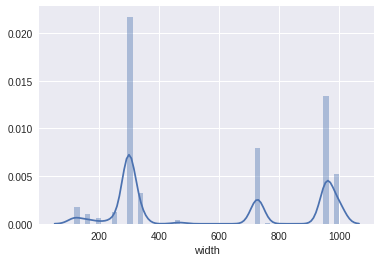

In [130]:
sns.distplot(impDf.width)

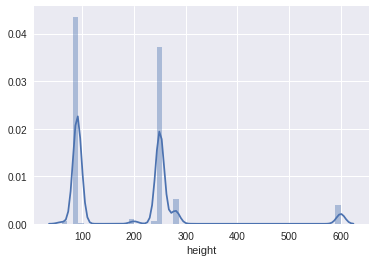

In [131]:
sns.distplot(impDf.height)

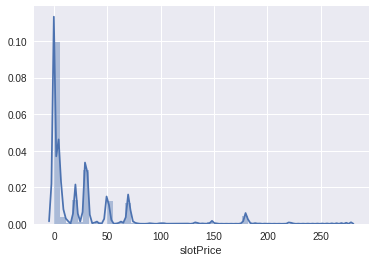

In [132]:
sns.distplot(impDf.slotPrice)

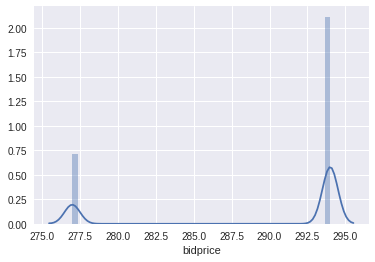

In [135]:
sns.distplot(impDf.bidprice)


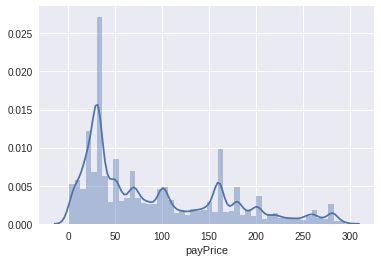

In [136]:
sns.distplot(impDf.payPrice)

In [152]:
from sklearn.preprocessing import MinMaxScaler
df = impDf[['width', 'height', 'slotPrice', 'bidprice', 'payPrice']]
min_max_scaler = MinMaxScaler()
df = min_max_scaler.fit_transform(df)
df = pd.DataFrame(df, columns=['width', 'height', 'slotPrice', 'bidprice', 'payPrice'] )

In [153]:
df.head()

,width,height,slotPrice,bidprice,payPrice
0,0.204545,0.351852,0.000000,1.0,0.682594
1,0.045455,1.000000,0.536232,0.0,0.501706
2,0.690909,0.055556,0.800725,0.0,0.750853
3,0.954545,0.055556,0.108696,1.0,0.119454
4,0.245455,0.407407,0.000000,1.0,0.484642


In [145]:
df.columns = ['width', 'height', 'slotPrice', 'bidprice', 'payPrice']

In [148]:
impDf[['width', 'height', 'slotPrice', 'bidprice', 'payPrice']] = df

In [149]:
impDf.head()

,bidID,Timestamp,logType,XYZID,useragent,ip,region,city,adexchange,domain,...,height,visibility,format,slotPrice,creativeId,bidprice,payPrice,keypageUrl,adverId,userTag
0,49b5a58c3a3c39c32ba5a36f70a3daa5,20131021192300738,1,C4NDR12~1B,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,222.218.230.*,238,246,1,9a2acabba41e00373f68053fd73e4d50,...,0.351852,FirstView,Na,0.000000,10722,1.0,0.682594,NaN,2821,10063
1,c1078ebfa50f21c9c835abe38ed9a30c,20131021100401227,1,C7JCqa3e3g,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT ...,183.9.173.*,216,236,2,13625cb070ffb306b425cd803c4b7ab4,...,1.000000,Na,Na,0.536232,7317,0.0,0.501706,NaN,2259,"10102,10024,13866,10133"
2,f19257fc9a29e12366e51ec0f6f89cdf,20131021100401241,1,C7JCqa3e3g,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT ...,183.9.173.*,216,236,2,13625cb070ffb306b425cd803c4b7ab4,...,0.055556,Na,Na,0.800725,7330,0.0,0.750853,NaN,2259,"10102,10024,13866,10133"
3,a10d601d8d23a36921ce597e0fb327f1,20131021210002124,1,C8INvJAR60,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT ...,218.107.8.*,216,217,4,de6d8b674cde8053f9c5c082d1c3032e,...,0.055556,FirstView,Na,0.108696,10717,1.0,0.119454,NaN,2821,"10048,16751,14273,10117,10083,13776,10110,1340..."
4,322cbb15e02fac50eef7597ed385dad7,20131021104212803,1,C9DH0S4Fezi,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT ...,14.118.89.*,216,223,1,f9945190249543d821199b597257ffe8,...,0.407407,ThirdView,Na,0.000000,7326,1.0,0.484642,NaN,2259,"10048,13800,10684,10074,10024,10006,10111,1013..."


In [23]:
sorted(list(set(['width', 'height', 'slotPrice', 'bidprice', 'payPrice']+['1'])))

['1', 'bidprice', 'height', 'payPrice', 'slotPrice', 'width']

In [25]:
import pickle
with open('5.pickle', 'rb') as handle:
    df = pickle.load(handle)

In [26]:
df.head()

,region,city,adexchange,width,height,visibility,format,slotPrice,bidprice,payPrice,click
bidID,,,,,,,,,,,
7281a6617675e62f6246fe18613003e9,80,93,4.0,0.954545,0.072727,FirstView,Na,0.000000,1.0,0.781570,0
3181e2272b4ce146851105f14bc8b5ae,2,2,3.0,0.954545,0.072727,Na,Na,0.018051,1.0,0.013652,0
346299e017720cd8719fba46f181d856,146,153,2.0,0.690909,0.072727,FirstView,Na,0.018051,0.0,0.587031,0
1b047aa4331ded143341b826db59676f,40,41,3.0,1.000000,0.072727,Na,Na,0.252708,1.0,0.235495,0
abf5d51a0258d52e754e1796456f8579,55,56,4.0,0.204545,0.363636,SecondView,Na,0.000000,1.0,0.361775,0


In [28]:
df.dtypes

region          int64
city            int64
adexchange    float64
width         float64
height        float64
visibility     object
format         object
slotPrice     float64
bidprice      float64
payPrice      float64
click           int64
dtype: object

In [31]:
df.visibility.unique()

array(['FirstView', 'Na', 'SecondView', 'FourthView', 'OtherView',
       'ThirdView', 'FifthView'], dtype=object)